In [116]:
# libraries
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline


In [117]:
dir = os.getcwd()
file_path = os.path.join(dir,"DataSets-main" )
cab_df = pd.read_csv(file_path + "/Cab_Data.csv")
city_df = pd.read_csv(file_path + "/City.csv")
customer_df = pd.read_csv(file_path + "/Customer_ID.csv")
transaction_df = pd.read_csv(file_path + "/Transaction_ID.csv")


cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [118]:
# Get information of the cab dataframe
cab_df.info()
# Percentage of missing values
print("Percentage of missing values")
cab_df.isnull().sum()/ len(cab_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
Percentage of missing values


Transaction ID    0.0
Date of Travel    0.0
Company           0.0
City              0.0
KM Travelled      0.0
Price Charged     0.0
Cost of Trip      0.0
dtype: float64

In [119]:
city_df.head()


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [120]:
city_df.info()

#Checking for null values
city_df.isna().sum() / len(city_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


City          0.0
Population    0.0
Users         0.0
dtype: float64

In [121]:
customer_df.head()


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [122]:
customer_df.info()

customer_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [123]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [124]:
transaction_df.info()

transaction_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

## Combining the datasets to one dataframe

In [125]:
# Customer information
customer_info = pd.merge(customer_df, transaction_df)
customer_info.head()


,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [126]:
# Cab information
cab_info = pd.merge(cab_df, city_df)
cab_info.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [127]:
customer_info.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Transaction ID',
       'Payment_Mode'],
      dtype='object')

In [128]:
#print the shapes of the initial dataframes
print(f"Shape for cab: {cab_df.shape}, customer : {customer_df.shape}, City: {city_df.shape}, transaction: {transaction_df.shape}")

Shape for cab: (359392, 7), customer : (49171, 4), City: (20, 3), transaction: (440098, 3)


In [129]:
customer_info.to_csv("customer_information.csv")
cab_info.to_csv("cab_information.csv")

In [130]:
# Select the columns to be encoded
target_columns = customer_info[['Gender', 'Payment_Mode']]

# Perform label encoding
label_encoder = LabelEncoder()
label_encoded = target_columns.apply(label_encoder.fit_transform)

# Perform one-hot encoding
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

# Get the feature names
encoded_feature_names = []
for col in target_columns.columns:
    # Getting the unique categorical values in the target columns
    unique_values = target_columns[col].unique()
    for value in unique_values:
        encoded_feature_names.append(f"{col}_{value}")

# create a dataframe of the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoded_feature_names)

# Concatenate the customer dataframe with the one-hot encoded columns
customer_info_encoded = pd.concat([customer_info.drop(target_columns, axis=1), one_hot_encoded_df], axis=1)

one_hot_encoded_df.head()


,Gender_Male,Gender_Female,Payment_Mode_Card,Payment_Mode_Cash
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0


## Understanding the relationships between the data

In [131]:
# combined data ---> Actionable data. It contains data of customers that have used the cab between 31/01/2016 to 31/12/2018
combined_df = customer_info_encoded.merge(cab_info, on='Transaction ID')
combined_df.to_csv("combined_df.csv")
combined_df.head()

,Customer ID,Age,Income (USD/Month),Transaction ID,Gender_Male,Gender_Female,Payment_Mode_Card,Payment_Mode_Cash,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,28,10813,10000011,0.0,1.0,1.0,0.0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,28,10813,10351127,0.0,1.0,0.0,1.0,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,28,10813,10412921,0.0,1.0,1.0,0.0,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,27,9237,10000012,0.0,1.0,1.0,0.0,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,27,9237,10320494,0.0,1.0,1.0,0.0,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [132]:
# Market share
combined_df['Company'].unique()
combined_df.columns

Index(['Customer ID', 'Age', 'Income (USD/Month)', 'Transaction ID',
       'Gender_Male', 'Gender_Female', 'Payment_Mode_Card',
       'Payment_Mode_Cash', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

### 1. Market share for each company
   -  It shows the level of acceptance or popularity of the cabs in the market.
   - The market share of each company is calculated by comparing the total number of trips made by each company to the total number of trips in the market

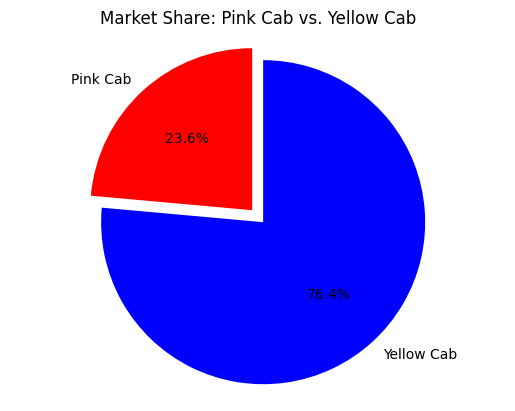

In [151]:
# Filter the dataframe based on Company
pink_cab_df = combined_df[(combined_df['Company'] == 'Pink Cab')]
yellow_cab_df = combined_df[(combined_df['Company'] == 'Yellow Cab')]

# Total number of trips for each company
pink_cab_trips = pink_cab_df.shape[0]
yellow_cab_trips = yellow_cab_df.shape[0]

# Total number of trips in the market
total_trips = combined_df.shape[0]

# Market share for each company
pink_cab_market_share = pink_cab_trips / total_trips * 100
yellow_cab_market_share = yellow_cab_trips / total_trips * 100

# Pie chart to visualize the market share
labels = ['Pink Cab', 'Yellow Cab']
sizes = [pink_cab_market_share, yellow_cab_market_share]
colors = ['r', 'b']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Market Share: Pink Cab vs. Yellow Cab')
plt.show()

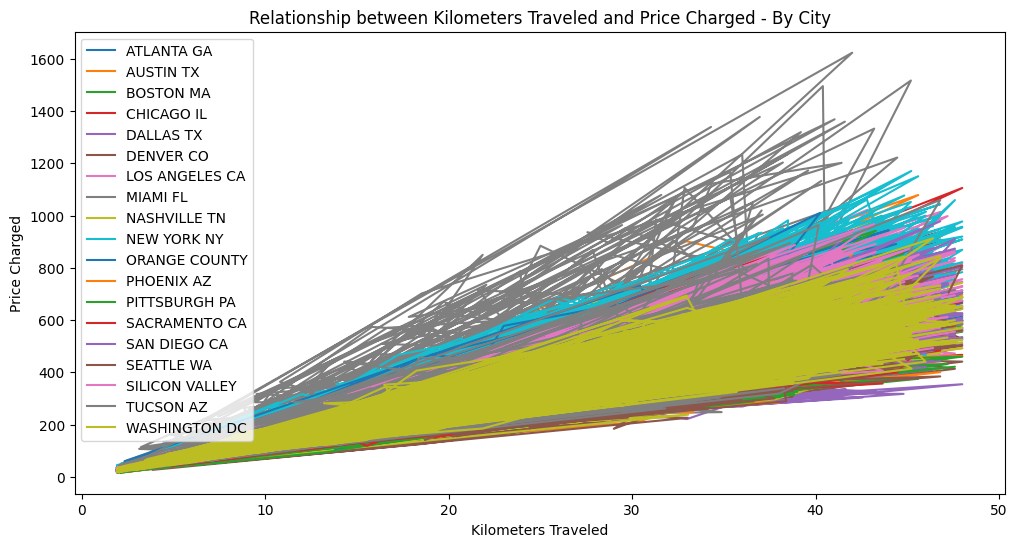

In [142]:
# Lambda function to filter data for each city and plot the line chart
plot_city_data = lambda city: combined_df[(combined_df['Company'] == 'Pink Cab') & (combined_df['City'] == city)]

# Get unique cities
cities = combined_df['City'].unique()

# Create a single line chart for each city
plt.figure(figsize=(12, 6))

for city in cities:
    city_data = plot_city_data(city)
    plt.plot(city_data['KM Travelled'], city_data['Price Charged'], label=city)

plt.xlabel('Kilometers Traveled')
plt.ylabel('Price Charged')
plt.title('Relationship between Kilometers Traveled and Price Charged - By City')
plt.legend()
plt.show()

In [139]:
filtered_data.head()

,Customer ID,Age,Income (USD/Month),Transaction ID,Gender_Male,Gender_Female,Payment_Mode_Card,Payment_Mode_Cash,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
30,59799,33,19271,10000019,0.0,1.0,0.0,1.0,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880,"248,968","80,021"
37,59799,33,19271,10225574,0.0,1.0,1.0,0.0,43004,Pink Cab,BOSTON MA,12.00,198.90,133.200,"248,968","80,021"
39,57982,57,5068,10000020,0.0,1.0,0.0,1.0,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256,"248,968","80,021"
45,57982,57,5068,10253240,0.0,1.0,1.0,0.0,43047,Pink Cab,BOSTON MA,44.40,651.16,475.080,"248,968","80,021"
46,57982,57,5068,10288059,0.0,1.0,1.0,0.0,43103,Pink Cab,BOSTON MA,42.12,572.07,463.320,"248,968","80,021"


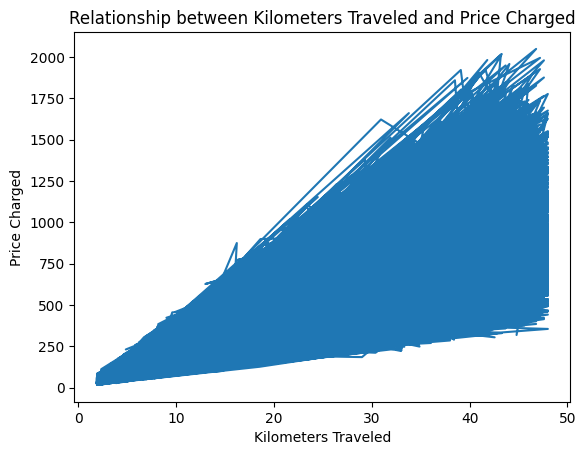

In [133]:
# Extract the 'KM Travelled' and 'Price Charged' columns
km_price_data = combined_df[['KM Travelled', 'Price Charged']]

# Plot the relationship between kilometers and price
plt.plot(km_price_data['KM Travelled'], km_price_data['Price Charged'])
plt.xlabel('Kilometers Traveled')
plt.ylabel('Price Charged')
plt.title('Relationship between Kilometers Traveled and Price Charged')
plt.show()